# M4.1.2 Incidence AIDS cases, polynomial regression

This dataset is formed by one feature (time), and one output (number of cases). We are going to use this data to show how to use a polynomial regression.

The steps to follow are:
1. Read the data and save the input in 'x' array and the output in 'y' array.
2. Plot 'x' vs 'y' to observe the output behavior
3. Obtain the linear model calculating W0 and w1 coefficients, the cost parameter, and plot the output obtained (yt) vs the output (y).
4. Add a second order feature ($x^2$), obtain the X matrix adding the 'Bias' feature (ones column), and calculate the vector W using the closed-form solution.
5. Calculate the cost function and plot the estimation.

In [1]:
#1. Read data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import pinv
import math



dataset = pd.read_csv('Sida.csv')

x = np.array(dataset['Time'])
y = np.array(dataset['Cases'])

dataset


,Time,Cases
0,1,185
1,2,200
2,3,293
3,4,374
4,5,554
5,6,713
6,7,763
7,8,857
8,9,1147
9,10,1369


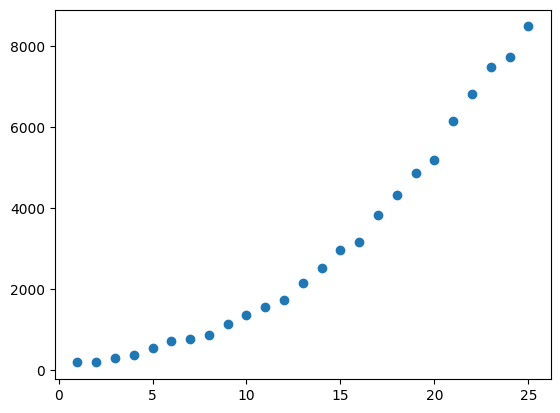

In [2]:
#2. Plot data

plt.scatter(x,y) # type: ignore

In [3]:
#Cost function
def costFuntion(y, y_hat):
    r = (y - y_hat)
    cost = np.dot(r.T, r) / len(r)
    return cost




In [4]:
# 3. Obtain a w0 and w1 for a linear regression and calculate yt = w0 + w1*x

# Agregar una columna de unos
def Bias(X):
    n = len(X)
    unos = np.ones(n)
    X1s = np.column_stack((unos,X))
    return X1s

x = np.array(dataset['Time'])
y = np.array(dataset['Cases'])
y = y.reshape(len(y), 1)

X1 = Bias(x)
print(X1)
print(X1.shape)
print(y.shape)



[[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 11.]
 [ 1. 12.]
 [ 1. 13.]
 [ 1. 14.]
 [ 1. 15.]
 [ 1. 16.]
 [ 1. 17.]
 [ 1. 18.]
 [ 1. 19.]
 [ 1. 20.]
 [ 1. 21.]
 [ 1. 22.]
 [ 1. 23.]
 [ 1. 24.]
 [ 1. 25.]]
(25, 2)
(25, 1)


### Polynomial function
We can add more powers to X to get a polynomial function: $$f(X,W) = \sum_{k=0}^{K}w_k x^k$$

In [5]:
def closedForm(X, y):
    W = np.dot(np.linalg.pinv(np.dot(X.T,X)), np.dot(X.T,y))
    return W

W = closedForm(X1,y)
print(W)
print(np.shape(W))


[[-1484.85      ]
 [  346.18230769]]
(2, 1)


In [6]:
y_hat = np.dot(X1, W)
print(y_hat)

[[-1138.66769231]
 [ -792.48538462]
 [ -446.30307692]
 [ -100.12076923]
 [  246.06153846]
 [  592.24384615]
 [  938.42615385]
 [ 1284.60846154]
 [ 1630.79076923]
 [ 1976.97307692]
 [ 2323.15538462]
 [ 2669.33769231]
 [ 3015.52      ]
 [ 3361.70230769]
 [ 3707.88461538]
 [ 4054.06692308]
 [ 4400.24923077]
 [ 4746.43153846]
 [ 5092.61384615]
 [ 5438.79615385]
 [ 5784.97846154]
 [ 6131.16076923]
 [ 6477.34307692]
 [ 6823.52538462]
 [ 7169.70769231]]


Costo:  [[541734.04132308]]


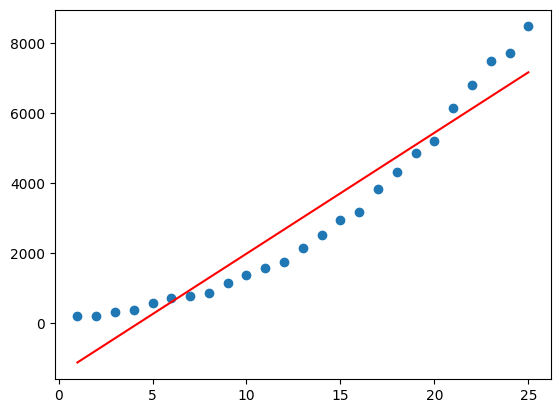

In [7]:
plt.scatter(x, y)
plt.plot(x, y_hat, c = 'r')

#Calculate cost
J = costFuntion(y, y_hat)
print('Costo: ', J)

In [8]:
# 4. Polynomial features

X2s = np.column_stack((x , x * x))

X21 = Bias(X2s)
print(X21)



[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]
 [  1.  11. 121.]
 [  1.  12. 144.]
 [  1.  13. 169.]
 [  1.  14. 196.]
 [  1.  15. 225.]
 [  1.  16. 256.]
 [  1.  17. 289.]
 [  1.  18. 324.]
 [  1.  19. 361.]
 [  1.  20. 400.]
 [  1.  21. 441.]
 [  1.  22. 484.]
 [  1.  23. 529.]
 [  1.  24. 576.]
 [  1.  25. 625.]]


In [9]:
#Calculate W Closed-form solution
W2 = closedForm(X21,y)
print(W2)
print(np.shape(W2))

[[343.59130435]
 [-60.13798216]
 [ 15.62770346]]
(3, 1)


In [10]:
#Prediction
y_hat2 = np.dot(X21, W2)
print(y_hat2)

[[ 299.08102564]
 [ 285.82615385]
 [ 303.82668896]
 [ 353.08263099]
 [ 433.59397993]
 [ 545.36073579]
 [ 688.38289855]
 [ 862.66046823]
 [1068.19344482]
 [1304.98182832]
 [1573.02561873]
 [1872.32481605]
 [2202.87942029]
 [2564.68943144]
 [2957.7548495 ]
 [3382.07567447]
 [3837.65190635]
 [4324.48354515]
 [4842.57059086]
 [5391.91304348]
 [5972.51090301]
 [6584.36416945]
 [7227.47284281]
 [7901.83692308]
 [8607.45641026]]


Costo x^2:  [[15966.21308896]]


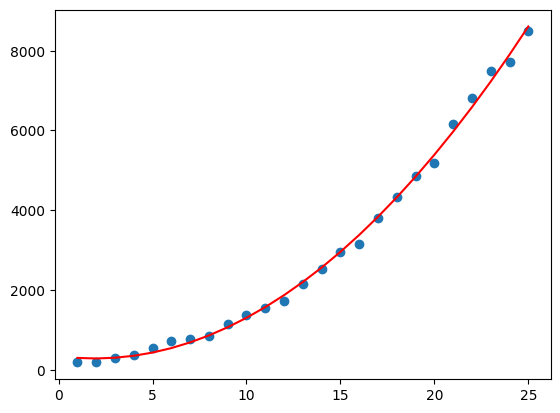

In [11]:
#Plot linear regression cuadratic
plt.scatter(x, y)
plt.plot(x, y_hat2, c = 'r')

#Calculate cost cuadratic model
J2 = costFuntion(y, y_hat2)
print('Costo x^2: ', J2)

[[ 2.64880870e+02]
 [-2.70136071e+01]
 [ 1.25042735e+01]
 [ 8.00879475e-02]]
(4, 1)
(25, 1)
costo X^3 [[15419.40718157]]


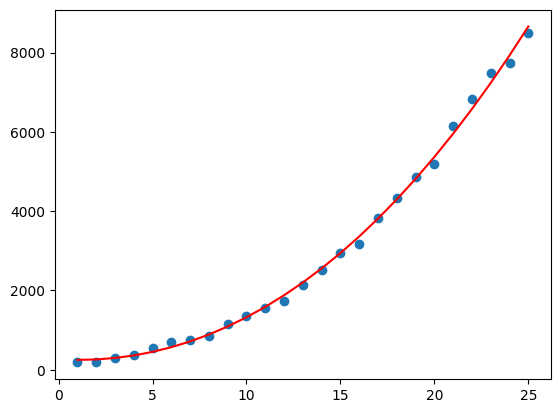

In [12]:
# Cubic model
X3s = np.column_stack((x, x*x, x**3))
X31 = Bias(X3s)

W3 = closedForm(X31, y)
print(W3)
print(np.shape(W3))

y_hat3 = np.dot(X31, W3)

print(y_hat3.shape)

J3 = costFuntion(y, y_hat3)

print("costo X^3", J3)

plt.scatter(x, y)
plt.plot(x, y_hat3, c='r')


### Non-polynomial function

The linear regression is not restricted to polynomial functions:


$$f(X,W) = w_0 + w_1 x + w_2 x^2 + w_3 sin\left(\frac{x-a}{b}\right)$$

donde a = 10, y b = 20

[[307.65241872]
 [-54.92225647]
 [ 15.47197536]
 [  6.49363084]]
(4, 1)
(25, 1)
costo X^3 [[14199.44596578]]


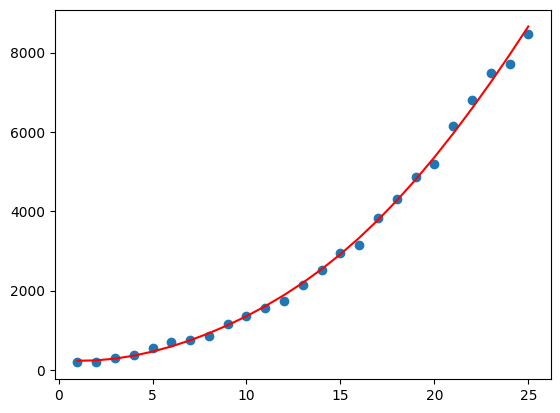

In [13]:
# Non-polynomial function
a = 3
b = 3
c = 10

Xss = np.column_stack((x, x*x, c*np.sin((x-a)/b)))

Xs1 = Bias(Xss)

Ws = closedForm(Xs1, y)

print(Ws)
print(np.shape(Ws))


y_hats = np.dot(Xs1, Ws)

print(y_hats.shape)

Js = costFuntion(y, y_hats)

print("costo X^3", Js)

plt.scatter(x, y)
plt.plot(x, y_hats, c='r')


## Tarea

Del Notebook anterior, el 4_1_1, tomar la dos columnas de los datos de Housing. Son los datos adjuntos en CANVAS. 

1. Implementar la regresión polinomial, agregando potencias a x hasta el 4o grado
2. De cada grado calcular el MSE
3. Comparar los resultados del MSE obtenidos. ¿Se disminuye el error? Escribe tus observaciones

In [14]:
dataset2 = pd.read_csv('Housing_2col.csv')
dataset2

,Unnamed: 0,TotalBsmtSF,SalePrice
0,0,856,208500
1,1,1262,181500
2,2,920,223500
3,3,756,140000
4,4,1145,250000
...,...,...,...
1417,1455,953,175000
1418,1456,1542,210000
1419,1457,1152,266500
1420,1458,1078,142125


In [15]:
x = np.array(dataset2['TotalBsmtSF'])
y = np.array(dataset2['SalePrice'])


x = x.reshape(len(x), 1)
print(x.shape)
y = y.reshape(len(y), 1)
print(y.shape)

(1422, 1)
(1422, 1)


[[39307.72399491]
 [  132.77966615]]
(2, 1)
(1422, 1)
costo  [[3.66009955e+09]]


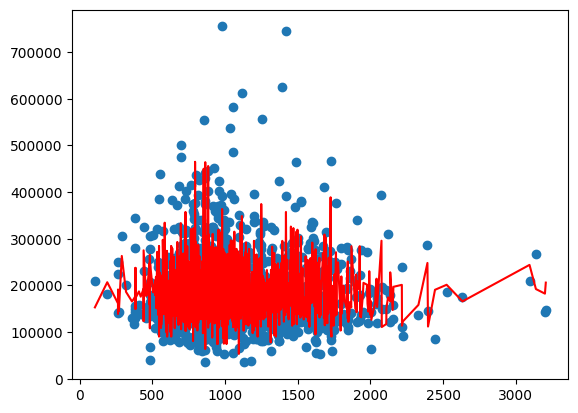

In [16]:
# 1. Implementar la regresión polinomial, agregando potencias a x hasta el 4o grado
#grado 1
#y_hat para grado 1 
#agregar bias
x = np.array(dataset2['TotalBsmtSF'])
y = np.array(dataset2['SalePrice'])

X1 = Bias(x)

y = y.reshape(len(y), 1)

W1 = closedForm(X1, y)
print(W1)
print(np.shape(W1))

y_hat = np.dot(X1, W1)
print(y_hat.shape)

J1 = costFuntion(y, y_hat)
print('costo ', J1)

x_sorted = np.sort(x)

plt.scatter(x_sorted, y)
plt.plot(x_sorted, y_hat, c='r')



[[39307.72399491]
 [  132.77966615]]
(2, 1)
(1422, 1)
costo  [[3.66009955e+09]]


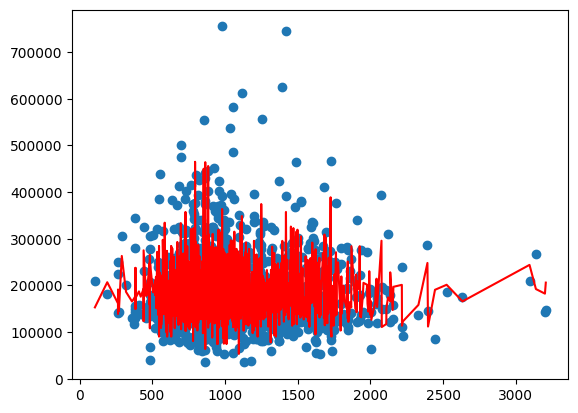

In [21]:
# grado 2
# y_hat para grado 2
# Hacer grado 2
x = np.array(dataset2['TotalBsmtSF'])
y = np.array(dataset2['SalePrice'])

x_sorted = np.sort(x)
X = np.column_stack((x, x*x))

X1 = Bias(x)

y = y.reshape(len(y), 1)

W1 = closedForm(X1, y)
print(W1)
print(np.shape(W1))

y_hat = np.dot(X1, W1)
print(y_hat.shape)

J1 = costFuntion(y, y_hat)
print('costo ', J1)


plt.scatter(x_sorted, y)
plt.plot(x_sorted, y_hat, c='r')


[[ 1.91121264e-01]
 [ 1.73331889e+02]
 [-3.92360487e-06]]
(3, 1)
(1422, 1)
costo  [[3.77961816e+09]]


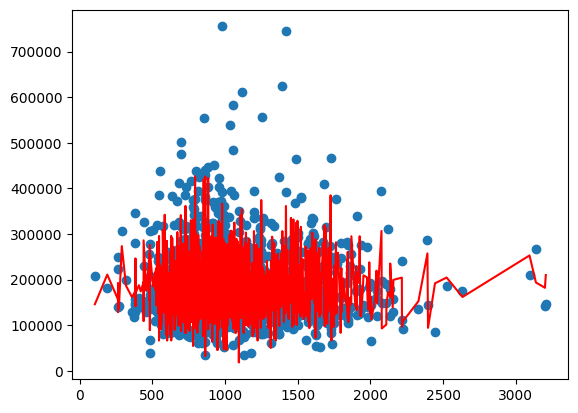

In [18]:
#grado 3
#y_hat para grado 3 
#Hacer grado 3
x = np.array(dataset2['TotalBsmtSF'])
y = np.array(dataset2['SalePrice'])

x_sorted = np.sort(x)
x = np.column_stack((x, x**3))

X1 = Bias(x)

y = y.reshape(len(y), 1)

W1 = closedForm(X1, y)
print(W1)
print(np.shape(W1))

y_hat = np.dot(X1, W1)
print(y_hat.shape)

J1 = costFuntion(y, y_hat)
print('costo ', J1)


plt.scatter(x_sorted, y)
plt.plot(x_sorted, y_hat, c='r')

[[8.18960906e-22]
 [1.42716046e-18]
 [1.49647133e-08]]
(3, 1)
(1422, 1)
costo  [[2.82885238e+10]]


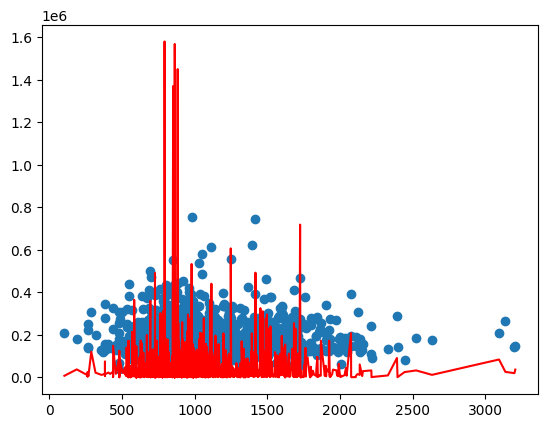

In [19]:
#grado 4
#y_hat para grado  
#Hacer grado 4
x = np.array(dataset2['TotalBsmtSF'])
y = np.array(dataset2['SalePrice'])

x_sorted = np.sort(x)
x = np.column_stack((x, x**4))

X1 = Bias(x)

y = y.reshape(len(y), 1)

W1 = closedForm(X1, y)
print(W1)
print(np.shape(W1))

y_hat = np.dot(X1, W1)
print(y_hat.shape)

J1 = costFuntion(y, y_hat)
print('costo ', J1)


plt.scatter(x_sorted, y)
plt.plot(x_sorted, y_hat, c='r')